In [1]:

from matplotlib import pyplot as plt
import time

def making_data():
    
    import numpy as np
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.pipeline import Pipeline, make_pipeline
    from sklearn.preprocessing import MinMaxScaler

    from sklearn.svm import SVC
    from sklearn import model_selection, svm, metrics
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.metrics import f1_score
    import os
    
    
    chat_data = os.listdir("./data")
    datas = []
    for data in chat_data:
        tmp = pd.read_csv('./data/{}'.format(data))
        datas.append(tmp)

    df = pd.concat(datas , axis=0, join='inner', ignore_index=True)
    df = df.set_index(keys=df.columns[0])

    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:, -1], random_state=0)
    anal_data = X_test[:]
    anal_data["validation"] = y_test


    scaler = MinMaxScaler()
    X_train = scaler.fit(X_train).transform(X_train)
    X_test = scaler.fit(X_test).transform(X_test)



    classifier = [LogisticRegression(), DecisionTreeClassifier(max_depth=10),
                 RandomForestClassifier(max_depth=10, n_estimators=10, max_features=1),
                 GaussianNB()]

    classifier_score = {}

    for classify in classifier:
        clf = classify
        clf.fit(X_train,  y_train)
        pre = clf.predict(X_test)
        anal_data["{}".format(str(classify).split("(")[0])] = pre
        
        ac_score = metrics.accuracy_score(y_test, pre)
        f1 = f1_score(y_test, pre)
        
        classifier_score["{}".format(str(classify).split("(")[0])] = [ac_score, f1,
                                                                     len(anal_data[anal_data["{}".format(str(classify).split("(")[0])] == 1]) / len(anal_data[anal_data["validation"] == 1]) * 100]
        clf = None
        
        
    
    return classifier_score, anal_data

score, result1 = making_data()

result = result1.copy()

import pandas as pd
result.index = pd.to_datetime(result.index)
result1.index = pd.to_datetime(result1.index)

result

result = result.sort_index()
result1 = result1.sort_index()

result['날짜'] = result.index
result1['날짜'] = result1.index

result['날짜'] = result['날짜'].apply(lambda x : str(x.date()))
result1['날짜'] = result1['날짜'].apply(lambda x : str(x.date()))

result = result[result['날짜'] == "2018-12-15"]
result1 = result1[result1['날짜'] == "2018-12-15"]

yes_data = result[result.GaussianNB == 1]
yes_data1 = result[result.validation == 1]

no_data = result[result.GaussianNB == 0]
no_data1 = result[result.validation == 0]

plt.figure(figsize=(16,4))
plt.plot(no_data.index, no_data['cnt_chat'])

plt.plot(yes_data.index, yes_data['cnt_chat'])

# plt.plot(no_data1.index, no_data1['cnt_chat'])

plt.plot(yes_data1.index, yes_data1['cnt_chat'])

plt.legend()
plt.show()

yes_data = result1[result1.validation == 1]
no_data = result1[result1.validation == 0]

plt.figure(figsize=(16,4))
plt.plot(no_data.index, no_data['cnt_chat'])
plt.plot(yes_data.index, yes_data.cnt_chat)
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<Figure size 1600x400 with 1 Axes>

<Figure size 1600x400 with 1 Axes>

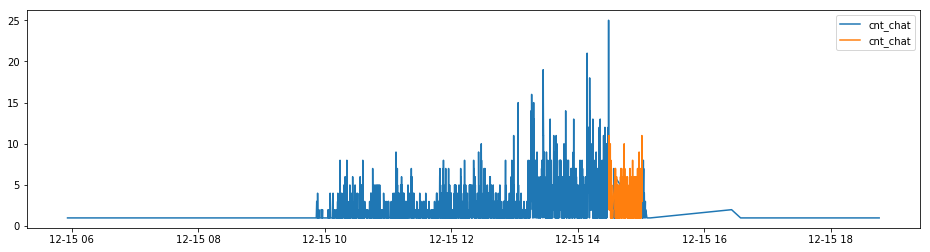

In [3]:
plt.figure(figsize=(16,4))
plt.plot(no_data.index, no_data['cnt_chat'])
plt.plot(yes_data.index, yes_data.cnt_chat)
plt.legend()
plt.show()

In [4]:
result1

,cnt_chat,cnt_ㅋ,cnt_ㄵ,cnt_오,cnt_와,cnt_유하,validation,LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,GaussianNB,날짜
time,,,,,,,,,,,,
2018-12-15 05:56:09,1,0,0,0,0,0,0,0,0,0,0,2018-12-15
2018-12-15 09:48:06,1,0,0,0,0,0,0,0,0,0,0,2018-12-15
2018-12-15 09:51:31,1,0,0,0,0,0,0,0,0,0,0,2018-12-15
2018-12-15 09:52:07,1,0,0,0,0,0,0,0,0,0,0,2018-12-15
2018-12-15 09:52:32,3,0,0,1,0,0,0,0,0,0,0,2018-12-15
2018-12-15 09:52:39,2,0,0,0,0,0,0,0,0,0,0,2018-12-15
2018-12-15 09:52:43,3,0,0,0,0,0,0,0,0,0,0,2018-12-15
2018-12-15 09:53:01,1,0,0,0,0,0,0,0,0,0,0,2018-12-15
2018-12-15 09:53:14,1,0,0,0,0,0,0,0,0,0,0,2018-12-15
